In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
df = pd.read_csv('MBA.csv')

In [3]:
df.shape

(121317, 20)

In [4]:
df.head()

,Unnamed: 0,SalesOrderID,OrderQty,UnitPrice,Revenue,CustomerID,OrderDate,OnlineOrderFlag,SalesChannel,ProductName,ProductID,StandardCost,ListPrice,DaysToManufacture,TotalCost,PriceBelowListPrice,Profit,ProductSubCatName,ProductCategory,Region
0,0,43659,1,2024.994,2024.994,29825,2011-05,False,Reseller,"Mountain-100 Black, 42",776,1898.0944,3374.99,4,1898.0944,1349.996,126.8996,Mountain Bikes,Bikes,Southeast
1,1,43659,3,2024.994,6074.982,29825,2011-05,False,Reseller,"Mountain-100 Black, 44",777,1898.0944,3374.99,4,5694.2832,1349.996,380.6988,Mountain Bikes,Bikes,Southeast
2,2,43659,1,2024.994,2024.994,29825,2011-05,False,Reseller,"Mountain-100 Black, 48",778,1898.0944,3374.99,4,1898.0944,1349.996,126.8996,Mountain Bikes,Bikes,Southeast
3,3,43659,1,2039.994,2039.994,29825,2011-05,False,Reseller,"Mountain-100 Silver, 38",771,1912.1544,3399.99,4,1912.1544,1359.996,127.8396,Mountain Bikes,Bikes,Southeast
4,4,43659,1,2039.994,2039.994,29825,2011-05,False,Reseller,"Mountain-100 Silver, 42",772,1912.1544,3399.99,4,1912.1544,1359.996,127.8396,Mountain Bikes,Bikes,Southeast


In [5]:
df.columns

Index(['Unnamed: 0', 'SalesOrderID', 'OrderQty', 'UnitPrice', 'Revenue',
       'CustomerID', 'OrderDate', 'OnlineOrderFlag', 'SalesChannel',
       'ProductName', 'ProductID', 'StandardCost', 'ListPrice',
       'DaysToManufacture', 'TotalCost', 'PriceBelowListPrice', 'Profit',
       'ProductSubCatName', 'ProductCategory', 'Region'],
      dtype='object')

In [6]:
df["ProductSubCatName"].nunique()

35

In [7]:
#Basket Analysis
basket = (df.groupby(['SalesOrderID', 'ProductSubCatName'])['OrderQty']
            .sum().unstack().reset_index().fillna(0)
            .set_index('SalesOrderID'))

#Basket Analysis
basket = (df.groupby(['SalesOrderID', 'ProductSubCatName'])['OrderQty']
            .sum().unstack().reset_index()
            .set_index('SalesOrderID'))

In [8]:
basket

ProductSubCatName,Bib-Shorts,Bike Racks,Bike Stands,Bottles and Cages,Bottom Brackets,Brakes,Caps,Chains,Cleaners,Cranksets,...,Road Frames,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Touring Frames,Vests,Wheels
SalesOrderID,,,,,,,,,,,,,,,,,,,,,
43659,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
43660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43661,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
75120,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [9]:
#Encoding the data
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [10]:
basket_sets = basket.applymap(encode_units)

basket_sets

ProductSubCatName,Bib-Shorts,Bike Racks,Bike Stands,Bottles and Cages,Bottom Brackets,Brakes,Caps,Chains,Cleaners,Cranksets,...,Road Frames,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Touring Frames,Vests,Wheels
SalesOrderID,,,,,,,,,,,,,,,,,,,,,
43659,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
43660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43661,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43662,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
43663,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
75120,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


type(basket_sets)

In [11]:
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.165644,(Bottles and Cages)
1,0.107485,(Caps)
2,0.067408,(Fenders)
3,0.077070,(Gloves)
4,0.238741,(Helmets)
5,0.151947,(Jerseys)
6,0.196568,(Mountain Bikes)
7,0.303130,(Road Bikes)
8,0.056507,(Shorts)
9,0.318767,(Tires and Tubes)


In [12]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [13]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Caps),(Jerseys),0.107485,0.151947,0.055490,0.516263,3.397658,0.039158,1.753127
1,(Jerseys),(Caps),0.151947,0.107485,0.055490,0.365196,3.397658,0.039158,1.405969
2,(Helmets),(Jerseys),0.238741,0.151947,0.052058,0.218051,1.435051,0.015782,1.084538
3,(Jerseys),(Helmets),0.151947,0.238741,0.052058,0.342606,1.435051,0.015782,1.157995
4,(Helmets),(Tires and Tubes),0.238741,0.318767,0.092198,0.386182,1.211488,0.016095,1.109829
5,(Tires and Tubes),(Helmets),0.318767,0.238741,0.092198,0.289232,1.211488,0.016095,1.071037


In [14]:
#Replace frozen set
rules['antecedent'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequent'] = rules['consequents'].apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent
0,(Caps),(Jerseys),0.107485,0.151947,0.055490,0.516263,3.397658,0.039158,1.753127,Caps,Jerseys
1,(Jerseys),(Caps),0.151947,0.107485,0.055490,0.365196,3.397658,0.039158,1.405969,Jerseys,Caps
2,(Helmets),(Jerseys),0.238741,0.151947,0.052058,0.218051,1.435051,0.015782,1.084538,Helmets,Jerseys
3,(Jerseys),(Helmets),0.151947,0.238741,0.052058,0.342606,1.435051,0.015782,1.157995,Jerseys,Helmets
4,(Helmets),(Tires and Tubes),0.238741,0.318767,0.092198,0.386182,1.211488,0.016095,1.109829,Helmets,Tires and Tubes
5,(Tires and Tubes),(Helmets),0.318767,0.238741,0.092198,0.289232,1.211488,0.016095,1.071037,Tires and Tubes,Helmets


In [15]:
#Transform the dataframe of rules into a metrix using the lift metric
matrix = rules.pivot(index = 'antecedent', columns = 'consequent', values = 'lift')

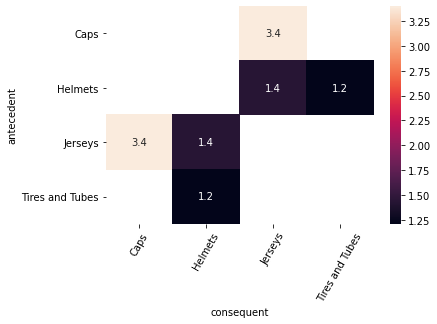

In [16]:
#plot a heatmap of the matrix
sns.heatmap(matrix, annot = True)
plt.yticks(rotation = 0)
plt.xticks(rotation = 60)
plt.show()